# Train SALLY with shuffled labels

Johann Brehmer, Kyle Cranmer, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
% matplotlib inline
import logging
import os

from madminer.sampling import SampleAugmenter
from madminer.sampling import multiple_benchmark_thetas
from madminer.sampling import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas
from madminer.ml import MLForge, EnsembleForge
from madminer.fisherinformation import FisherInformation
from madminer.plotting import plot_fisher_information_contours_2d

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')

In [2]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_2/'

In [3]:
sample_dir = base_dir + 'data/samples/wgamma/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma/'
log_dir = base_dir + 'logs/wgamma/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'
model_dir = base_dir + 'data/models/wgamma/'

## Settings

In [4]:
n_estimators = 10

## Train

In [6]:
def train_ensemble(filename, use_tight_cuts=True, n_estimators=10, **kwargs):
    cut_label = '_tight' if use_tight_cuts else ''
    
    ensemble = EnsembleForge(n_estimators, debug=False)

    ensemble.train_all(
        method='sally',
        x_filename=[sample_dir + 'train_local{}/x_train_{}.npy'.format(cut_label, i) for i in range(n_estimators)],
        t_xz0_filename=[sample_dir + 'train_local{}/t_xz_train_{}.npy'.format(cut_label, i) for i in range(n_estimators)],
        **kwargs
    )

    ensemble.save(model_dir + 'sally_ensemble_' + filename)

In [6]:
train_ensemble('shuffled', use_tight_cuts=False, shuffle_labels=True)

17:17  
17:17  ------------------------------------------------------------
17:17  |                                                          |
17:17  |  MadMiner v2018.11.12                                    |
17:17  |                                                          |
17:17  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
17:17  |                                                          |
17:17  ------------------------------------------------------------
17:17  
17:17  Training 10 estimators in ensemble
17:17  Training estimator 1 / 10 in ensemble
17:17  Starting training
17:17    Method:                 sally
17:17    Training data: x at /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/train_local/x_train_0.npy
17:17                   t_xz (theta0) at  /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/train_local/t_xz_train_0.npy
17:17    Features:               all
17:17    Method:                 sal

21:04    Shuffle labels          True
21:04    Regularization:         None
21:04  Loading training data
21:04  Found 1000000 samples with 2 parameters and 27 observables
21:04  Rescaling inputs
21:04  Creating model for method sally
21:04  Training model
21:12    Epoch 5: train loss 3.9698 (mse_score: 3.9698)
21:19    Epoch 10: train loss 3.9565 (mse_score: 3.9565)
21:26    Epoch 15: train loss 3.9469 (mse_score: 3.9469)
21:32    Epoch 20: train loss 3.9408 (mse_score: 3.9408)
21:37    Epoch 25: train loss 3.9362 (mse_score: 3.9362)
21:43    Epoch 30: train loss 3.9319 (mse_score: 3.9319)
21:48    Epoch 35: train loss 3.9271 (mse_score: 3.9271)
21:54    Epoch 40: train loss 3.9237 (mse_score: 3.9237)
22:00    Epoch 45: train loss 3.9215 (mse_score: 3.9215)
22:06    Epoch 50: train loss 3.9200 (mse_score: 3.9200)
22:06  Finished training
22:06  Training estimator 6 / 10 in ensemble
22:06  Starting training
22:06    Method:                 sally
22:06    Training data: x at /Users/johan

01:30    Activation function:    tanh
01:30    Batch size:             128
01:30    Trainer:                amsgrad
01:30    Epochs:                 50
01:30    Learning rate:          0.01 initially, decaying to 0.0001
01:30    Validation split:       None
01:30    Early stopping:         True
01:30    Scale inputs:           True
01:30    Shuffle labels          True
01:30    Regularization:         None
01:30  Loading training data
01:30  Found 1000000 samples with 2 parameters and 27 observables
01:30  Rescaling inputs
01:30  Creating model for method sally
01:30  Training model
01:35    Epoch 5: train loss 7.3313 (mse_score: 7.3313)
01:39    Epoch 10: train loss 7.3133 (mse_score: 7.3133)
01:44    Epoch 15: train loss 7.3051 (mse_score: 7.3051)
01:48    Epoch 20: train loss 7.2989 (mse_score: 7.2989)
01:53    Epoch 25: train loss 7.2946 (mse_score: 7.2946)
01:57    Epoch 30: train loss 7.2916 (mse_score: 7.2916)
02:02    Epoch 35: train loss 7.2882 (mse_score: 7.2882)
02:06    Epo

## Calculate expectations

In [18]:
ensemble = EnsembleForge()

ensemble.load(model_dir + 'sally_ensemble_shuffled')

ensemble.calculate_expectation(x_filename=sample_dir + 'validation/x_validation.npy')

ensemble.save(model_dir + 'sally_ensemble_shuffled')

15:33  Found ensemble with 10 estimators and expectations None
15:33  Calculating expectation for 10 estimators in ensemble
15:33  Starting evaluation for estimator 1 / 10 in ensemble
15:33  Starting evaluation for estimator 2 / 10 in ensemble
15:33  Starting evaluation for estimator 3 / 10 in ensemble
15:34  Starting evaluation for estimator 4 / 10 in ensemble
15:34  Starting evaluation for estimator 5 / 10 in ensemble
15:34  Starting evaluation for estimator 6 / 10 in ensemble
15:35  Starting evaluation for estimator 7 / 10 in ensemble
15:35  Starting evaluation for estimator 8 / 10 in ensemble
15:35  Starting evaluation for estimator 9 / 10 in ensemble
15:36  Starting evaluation for estimator 10 / 10 in ensemble


## Evaluation

In [5]:
fisher = FisherInformation(sample_dir + 'samples.h5', debug=True)

16:23  
16:23  ------------------------------------------------------------
16:23  |                                                          |
16:23  |  MadMiner v2018.11.13                                    |
16:23  |                                                          |
16:23  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
16:23  |                                                          |
16:23  ------------------------------------------------------------
16:23  
16:23  Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples.h5
16:23  Found 2 parameters:
16:23     cWWW (LHA: dim6 1, maximal power in squared ME: (2,), range: (-0.02, 0.02))
16:23     cWWWtilde (LHA: dim6 2, maximal power in squared ME: (2,), range: (-0.02, 0.02))
16:23  Found 6 benchmarks:
16:23     sm: cWWW = 0.00e+00, cWWWtilde = 0.00e+00
16:23     morphing_basis_vector_1: cWWW = -6.07e-03, cWWWtilde = -1.84e-02
16:23     morphing_basis_vector_2: 

In [13]:
mean, cov = fisher.calculate_fisher_information_full_detector(
    theta=[0.,0.],
    luminosity=300000.,
    model_file=model_dir + 'sally_ensemble_shuffled',
    test_split=0.5,
    include_xsec_info=False,
    uncertainty="sum"
)

18:22  Loading ensemble setup from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/models/wgamma/sally_ensemble_shuffled/ensemble.json
18:22  Found ensemble with 10 estimators and expectations [[ 0.00945755  0.00319982]
 [-0.0086288  -0.0020026 ]
 [ 0.01502106  0.00133386]
 [ 0.00042372 -0.00176944]
 [ 0.00095995 -0.00785334]
 [-0.00104095 -0.004577  ]
 [-0.00298309  0.00376815]
 [ 0.00109536  0.00062438]
 [-0.00323397 -0.00100783]
 [ 0.00495658  0.00293472]]
18:23  Evaluating kinematic Fisher information on batch 1 / 10
18:24  Evaluating kinematic Fisher information on batch 2 / 10
18:24  Evaluating kinematic Fisher information on batch 3 / 10
18:24  Evaluating kinematic Fisher information on batch 4 / 10
18:24  Evaluating kinematic Fisher information on batch 5 / 10
18:25  Evaluating kinematic Fisher information on batch 6 / 10
18:25  Evaluating kinematic Fisher information on batch 7 / 10
18:25  Evaluating kinematic Fisher information on batch 8 / 10
18:26  Evaluatin

/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


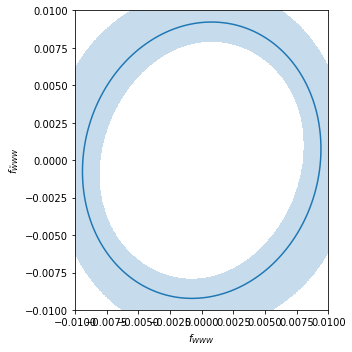

In [14]:
xmax = 0.01

fig = plot_fisher_information_contours_2d(
    fisher_information_matrices=[mean],
    fisher_information_covariances=[cov],
    contour_distance=1.,
    xrange=(-xmax,xmax),
    yrange=(-xmax,xmax),
    xlabel=r'$f_{WWW}$',
    ylabel=r'$f_{\tilde{W}WW}$',
    resolution=600,
)